In [18]:
import requests
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [19]:
url = "https://www.gutenberg.org/files/11/11-0.txt"
response = requests.get(url)
book_text = response.text

In [20]:
book_text[:2000]

'ï»¿The Project Gutenberg eBook of Aliceâ\x80\x99s Adventures in Wonderland, by Lewis Carroll\r\n\r\nThis eBook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever. You may copy it, give it away or re-use it under the terms\r\nof the Project Gutenberg License included with this eBook or online at\r\nwww.gutenberg.org. If you are not located in the United States, you\r\nwill have to check the laws of the country where you are located before\r\nusing this eBook.\r\n\r\nTitle: Aliceâ\x80\x99s Adventures in Wonderland\r\n\r\nAuthor: Lewis Carroll\r\n\r\nRelease Date: January, 1991 [eBook #11]\r\n[Most recently updated: October 12, 2020]\r\n\r\nLanguage: English\r\n\r\nCharacter set encoding: UTF-8\r\n\r\nProduced by: Arthur DiBianca and David Widger\r\n\r\n*** START OF THE PROJECT GUTENBERG EBOOK ALICEâ\x80\x99S ADVENTURES IN WONDERLAND ***\r\n\r\n[Illustration]\r\n\r\n\r\n\r\n\r\nAliceâ\x80\x9

In [21]:
book_text = response.text.encode('latin1').decode('utf-8-sig')
book_text[:1000]

'The Project Gutenberg eBook of Alice’s Adventures in Wonderland, by Lewis Carroll\r\n\r\nThis eBook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever. You may copy it, give it away or re-use it under the terms\r\nof the Project Gutenberg License included with this eBook or online at\r\nwww.gutenberg.org. If you are not located in the United States, you\r\nwill have to check the laws of the country where you are located before\r\nusing this eBook.\r\n\r\nTitle: Alice’s Adventures in Wonderland\r\n\r\nAuthor: Lewis Carroll\r\n\r\nRelease Date: January, 1991 [eBook #11]\r\n[Most recently updated: October 12, 2020]\r\n\r\nLanguage: English\r\n\r\nCharacter set encoding: UTF-8\r\n\r\nProduced by: Arthur DiBianca and David Widger\r\n\r\n*** START OF THE PROJECT GUTENBERG EBOOK ALICE’S ADVENTURES IN WONDERLAND ***\r\n\r\n[Illustration]\r\n\r\n\r\n\r\n\r\nAlice’s Adventures in Wonderland\r\n\r\n

In [22]:
chapter_splits = re.split(r'CHAPTER [IVXLCDM]+\.', book_text)

chapters = []

for chapter in chapter_splits[1:]:
    chapter = chapter.strip()
    if chapter:
        chapters.append(chapter)
        
end_index = chapters[-1].find("THE END")
if end_index != -1:
    chapters[-1] = chapters[-1][:end_index].strip()
    
len(chapters)

24

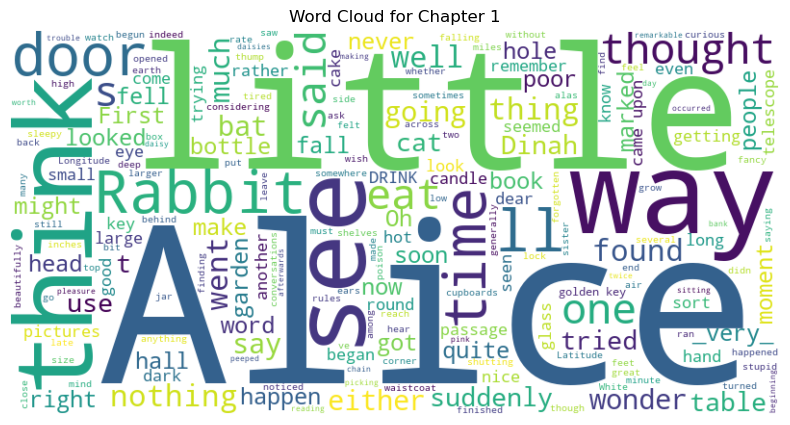

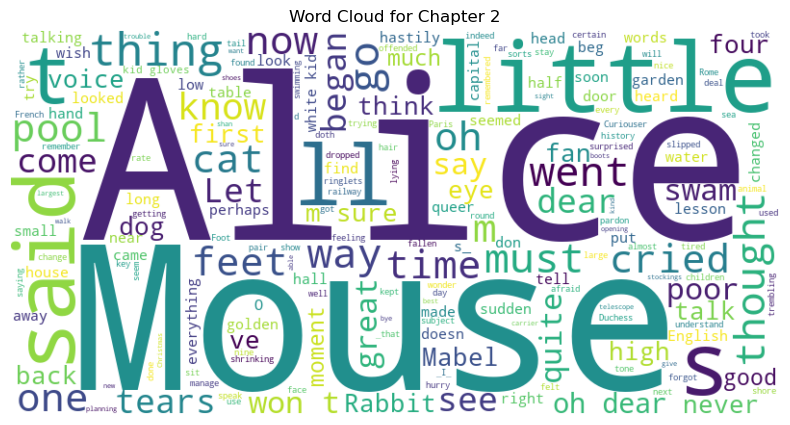

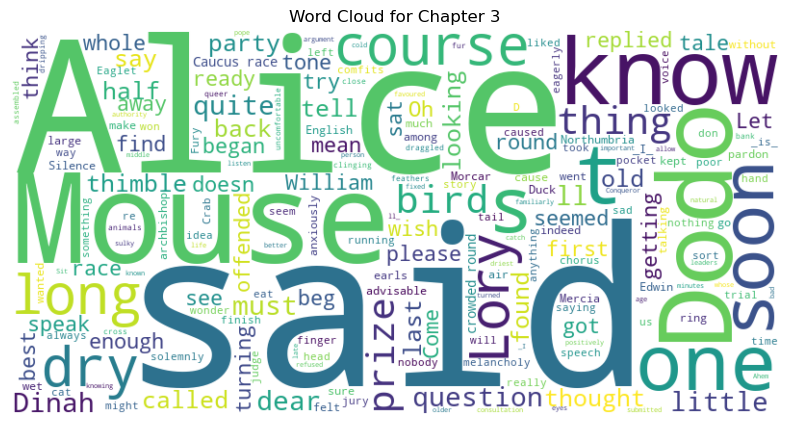

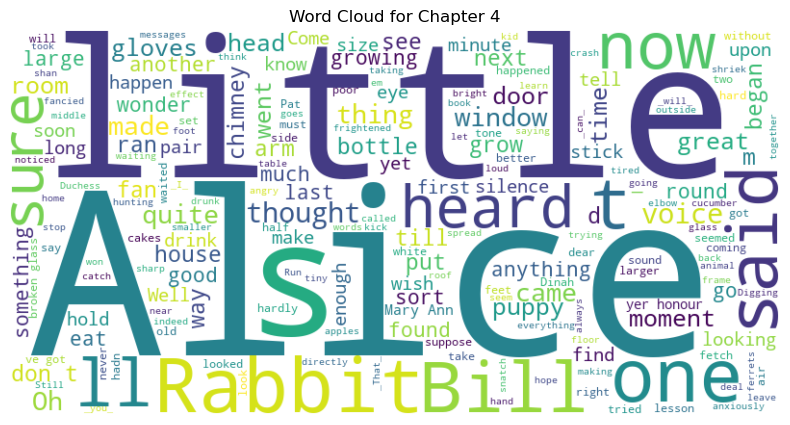

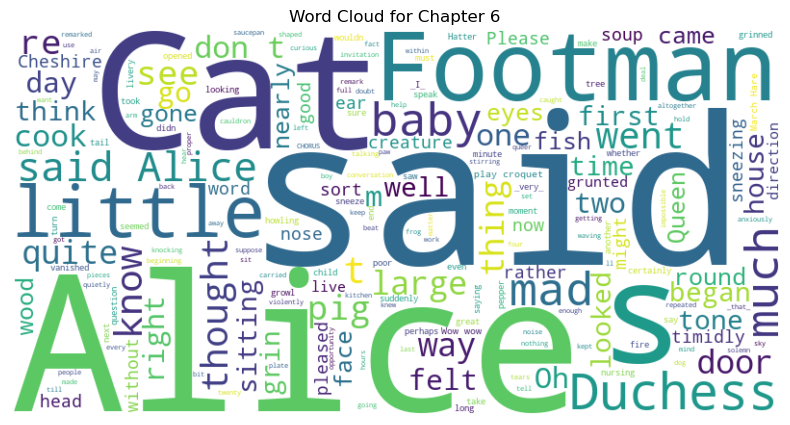

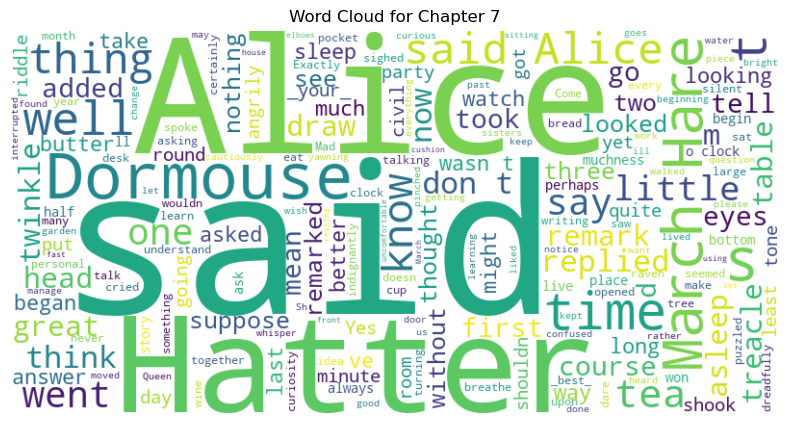

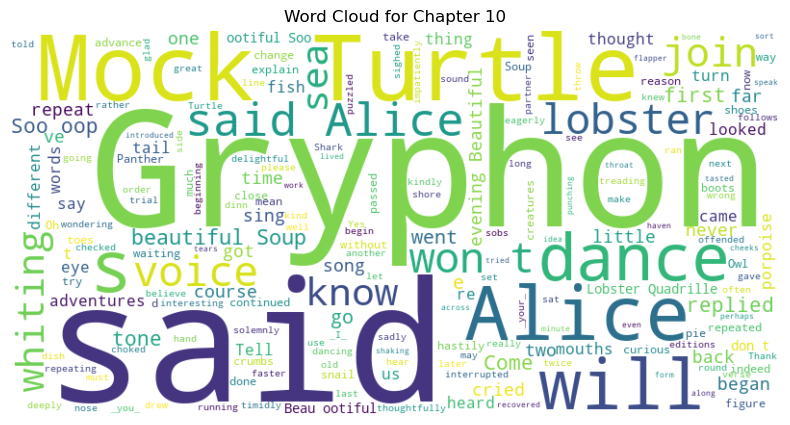

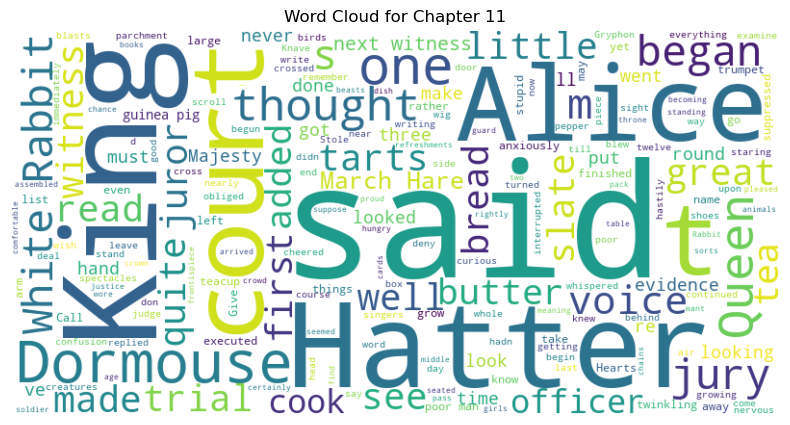

In [24]:
for i, chapter in enumerate (chapters[12:]):
    
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis')
    
    wordcloud.generate(chapter)
    
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Chapter {i+1}')
    plt.axis('off')
    plt.show()